**Import required packages**

In [311]:
import pandas as pd
from datetime import datetime
from IPython.display import display

**Collect the Data**

In [312]:
# Load CSVs and assign to variables
customers = pd.read_csv("/Users/joelkeeble/Documents/Job Application/Ipswich Town/customer_data/CustomerDetail-Table 1.csv")
memberships = pd.read_csv("/Users/joelkeeble/Documents/Job Application/Ipswich Town/customer_data/Membership-Table 1.csv")
merchandise = pd.read_csv("/Users/joelkeeble/Documents/Job Application/Ipswich Town/customer_data/Merchandise-Table 1.csv")
emails = pd.read_csv("/Users/joelkeeble/Documents/Job Application/Ipswich Town/customer_data/ContactCommunicationAggregate-Table 1.csv")
tickets = pd.read_csv("/Users/joelkeeble/Documents/Job Application/Ipswich Town/customer_data/Tickets-Table 1.csv")
totals = pd.read_csv("/Users/joelkeeble/Documents/Job Application/Ipswich Town/customer_data/TotalValueStatic-Table 1.csv")

# Merge datasets on primary key 'GroupID'
df = customers.merge(totals, on="GroupID", how="left")\
              .merge(emails, on="GroupID", how="left")\
              .merge(tickets, on="GroupID", how="left")
#              .merge(merchandise, on="GroupID", how="left")


In [313]:
# Ensure only the latest membership is kept for each GroupID

# Convert the purchase date column to datetime
memberships['transactionpurchasedate'] = pd.to_datetime(memberships['transactionpurchasedate'], dayfirst=True, errors='coerce')

# Count total memberships per GroupID
membership_counts = memberships.groupby('GroupID').size().reset_index(name='total_memberships')

# Convert the count to int
membership_counts['total_memberships'] = membership_counts['total_memberships'].astype(int)

# Sort to get the latest membership per customer
latest_memberships = memberships.sort_values('transactionpurchasedate', ascending=False)\
                                .drop_duplicates(subset='GroupID', keep='first')

# Merge in the count
latest_memberships = latest_memberships.merge(membership_counts, on='GroupID', how='left')

# Merge with main df
df = df.merge(latest_memberships, on='GroupID', how='left')



/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/1528972087.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  memberships['transactionpurchasedate'] = pd.to_datetime(memberships['transactionpurchasedate'], dayfirst=True, errors='coerce')


**Clean the data**

In [314]:
# Handle missing values
df.fillna(0, inplace=True)

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/4281930097.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


In [315]:
# Drop unnecessary columns caused by stray commas in the CSV
df = df.loc[:, ~df.columns.str.startswith('Unnamed:')]


In [316]:
df['Ticket spend TOTAL'] = df['Ticket spend TOTAL'].str.replace('£', '').astype(float)
df['Merchandise spend TOTAL'] = df['Merchandise spend TOTAL'].str.replace('£', '')
df['Merchandise spend TOTAL'] = df['Merchandise spend TOTAL'].str.replace(',', '').astype(float)
df['TOTAL spend'] = df['TOTAL spend'].str.replace('£', '')
df['TOTAL spend'] = df['TOTAL spend'].str.replace(',', '').astype(float)
df['Membership spend TOTAL'] = df['Membership spend TOTAL'].str.replace('£', '')
df['Membership spend TOTAL'] = df['Membership spend TOTAL'].str.replace(',', '').astype(float)


**Feature Engineering**

In [317]:
from datetime import datetime
import pandas as pd

# Convert to datetime
df['arrivaldate'] = pd.to_datetime(df['arrivaldate'], dayfirst=True, errors='coerce')
df['activityscale'] = pd.to_datetime(df['activityscale'], dayfirst=True, errors='coerce')

# Use today's date
today = datetime.today()

# Calculate tenure days (while columns are still datetime)
df['total_tenure_days'] = (today - df['arrivaldate']).dt.days
df['last_activity_days'] = (today - df['activityscale']).dt.days

# (Optional) Format the date columns for display AFTER calculations
df['arrivaldate'] = df['arrivaldate'].dt.strftime("%d/%m/%Y %H:%M")
df['activityscale'] = df['activityscale'].dt.strftime("%d/%m/%Y %H:%M")


/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/4060673086.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['arrivaldate'] = pd.to_datetime(df['arrivaldate'], dayfirst=True, errors='coerce')
/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/4060673086.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['activityscale'] = pd.to_datetime(df['activityscale'], dayfirst=True, errors='coerce')


In [318]:
display(df)

,GroupID,arrivaldate,SSOcreatedate,activityscale,Ticket spend TOTAL,Membership spend TOTAL,Merchandise spend TOTAL,TOTAL spend,EmailsSent,EmailOpenRate%,...,occasionstartdate,occasiondescription,opponentname,membershiptypeID,transactionprice_y,transactionpurchasedate_y,membershiptype,total_memberships,total_tenure_days,last_activity_days
0,111578,12/12/2021 16:45,0,07/06/2025 21:20,32.0,79.98,0.0,111.98,901.0,96.0,...,8/17/24 12:30,IpswichTown v Liverpool,Liverpool,467a8775-c919-ef11-8444-84857200de01,£39.99,2024-07-20 16:43:00,2024/25 Super Blues Membership,2.0,1312,39
1,32438,12/12/2021 16:45,0,01/12/2025 13:29,10.0,114.96,0.0,124.96,0.0,0.0,...,1/12/25 15:00,IpswichTown v Bristol Rovers,Bristol Rovers,0,0,0,0,0.0,1312,-138
2,32438,12/12/2021 16:45,0,01/12/2025 13:29,10.0,114.96,0.0,124.96,0.0,0.0,...,1/12/25 15:00,IpswichTown v Bristol Rovers,Bristol Rovers,0,0,0,0,0.0,1312,-138
3,1303877,18/07/2024 05:05,0,23/10/2024 13:00,34.0,304.93,0.0,338.93,0.0,0.0,...,8/17/24 12:30,IpswichTown v Liverpool,Liverpool,0,0,0,0,0.0,363,266
4,118942,12/12/2021 16:45,6/28/23 17:44,07/06/2025 17:56,7.0,93.49,332.0,432.49,956.0,41.0,...,3/23/25 14:00,IpswichTown v Plymouth Arygle,Plymouth Arygle,69388d28-fb60-4f3b-9ddd-60808f2f2779,£15.00,2013-03-26 00:00:00,2013/14 GOLD MEMBERSHIP,4.0,1312,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,127480,12/12/2021 16:45,8/14/23 9:05,24/05/2025 12:04,41.0,79.98,12.0,132.98,156.0,1.0,...,12/21/24 15:00,IpswichTown v Newcastle United,Newcastle United,467a8775-c919-ef11-8444-84857200de01,£39.99,2024-07-16 16:03:00,2024/25 Super Blues Membership,2.0,1312,53
196,61414,12/12/2021 16:45,0,07/03/2025 15:02,36.0,214.93,164.6,415.53,649.0,28.0,...,3/15/25 15:00,IpswichTown v Nottingham Forest,Nottingham Forest,467a8775-c919-ef11-8444-84857200de01,£39.99,2024-07-16 18:34:00,2024/25 Super Blues Membership,3.0,1312,131
197,864924,04/03/2023 11:47,5/1/24 21:09,07/07/2025 16:51,595.0,414.90,0.0,1009.90,561.0,98.0,...,4/2/24 0:00,2024/25 - SEASON TICKET,0,0,0,0,0,0.0,865,9
198,27424,12/12/2021 16:45,8/11/24 19:32,07/07/2025 08:02,15.0,99.98,109.0,223.98,942.0,56.0,...,8/10/24 12:30,IpswichTown v OGC NICE,OGC NICE,a2f1b3bd-0a9d-eb11-82e4-d73c58c895cf,£29.99,2021-11-13 11:35:00,2021/22 - Silver Membership (Non S/T Holders),1.0,1312,9


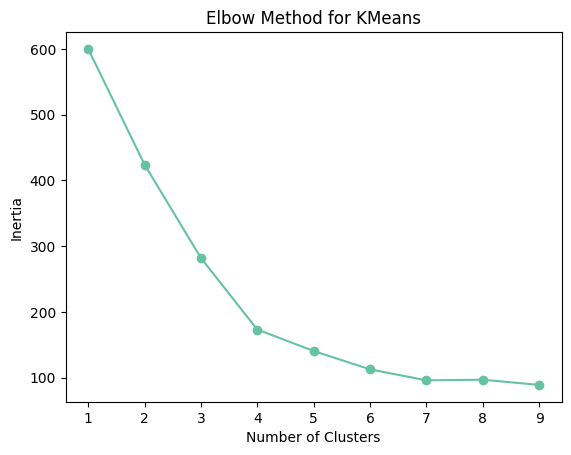

In [319]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select features
# features = ['Ticket spend TOTAL', 'Membership spend TOTAL', 'Merchandise spend TOTAL', 'TOTAL spend', 'total_tenure_days', 'EmailClicksRate%']
features = ['TOTAL spend', 'total_tenure_days', 'EmailClicksRate%']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for KMeans")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [320]:
# Choose optimal k (e.g., 3)
kmeans = KMeans(n_clusters=4, random_state=1)
df['segment'] = kmeans.fit_predict(X_scaled)


/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/1343774316.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segment', y='TOTAL spend', palette=colors)


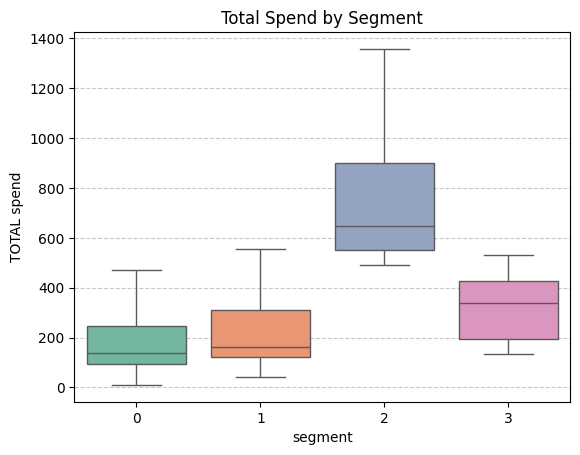

<Figure size 1000x600 with 0 Axes>

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/1343774316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segment', y='Ticket spend TOTAL', palette=colors)


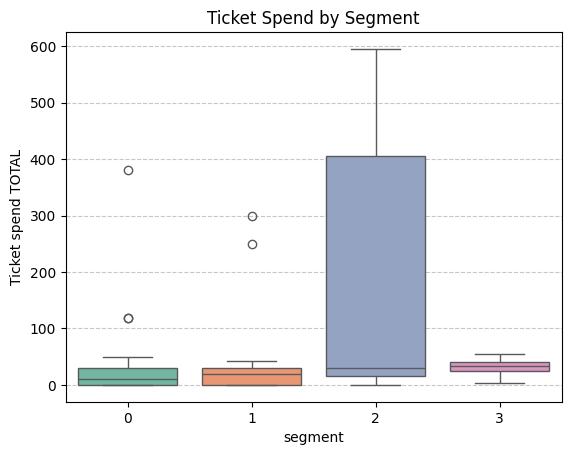

<Figure size 1000x600 with 0 Axes>

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/1343774316.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segment', y='Merchandise spend TOTAL', palette=colors)


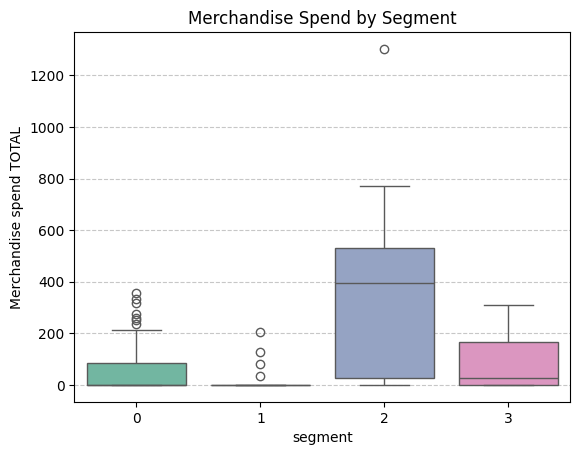

<Figure size 1000x600 with 0 Axes>

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/1343774316.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segment', y='Membership spend TOTAL', palette=colors)


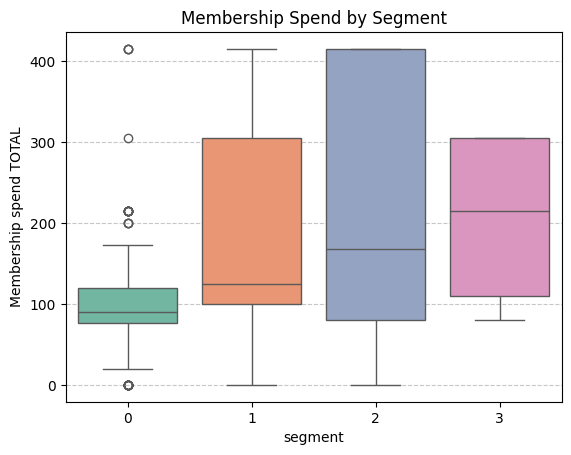

<Figure size 1000x600 with 0 Axes>

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/1343774316.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segment', y='EmailClicksRate%', palette=colors)


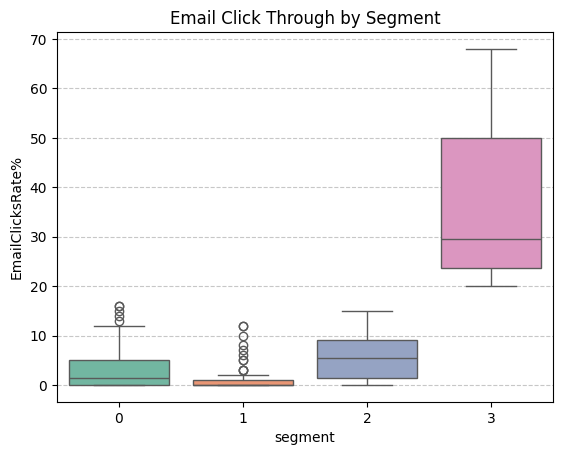

<Figure size 1000x600 with 0 Axes>

/var/folders/sw/q5mcqkfx0glbs5xzydvbcb280000gn/T/ipykernel_81930/1343774316.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='segment', y='total_tenure_days', palette=colors)


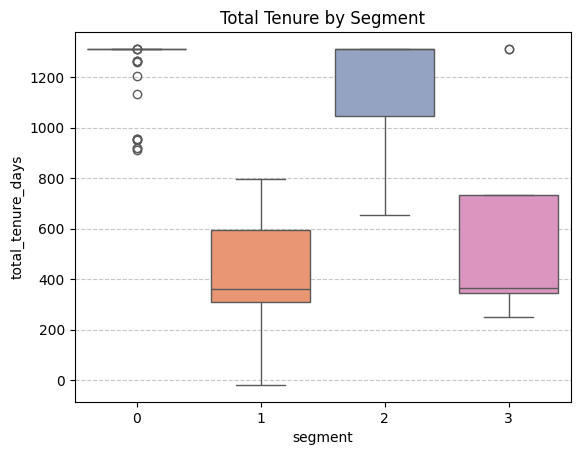

<Figure size 1000x600 with 0 Axes>

In [321]:
# Create colour palette for segments
unique_segments = df['segment'].nunique()
colors = sns.color_palette("Set2", n_colors=unique_segments)

# Visualize spending patterns by segment
sns.boxplot(data=df, x='segment', y='TOTAL spend', palette=colors)
plt.title("Total Spend by Segment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Ticket spend
sns.boxplot(data=df, x='segment', y='Ticket spend TOTAL', palette=colors)
plt.title("Ticket Spend by Segment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Merchandise spend
sns.boxplot(data=df, x='segment', y='Merchandise spend TOTAL', palette=colors)
plt.title("Merchandise Spend by Segment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Membership spend
sns.boxplot(data=df, x='segment', y='Membership spend TOTAL', palette=colors)
plt.title("Membership Spend by Segment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Email engagement
sns.boxplot(data=df, x='segment', y='EmailClicksRate%', palette=colors)
plt.title("Email Click Through by Segment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Membership tenure
sns.boxplot(data=df, x='segment', y='total_tenure_days', palette=colors)
plt.title("Total Tenure by Segment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()


